In [ ]:
from utils import * 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

users_df, billing_df, sessions_df, events_df = load_data()


   is_enterprise acquisition_channel  user_count
3          False                 seo       33782
0          False                 ads       24408
2          False             partner       24120
1          False            outbound       14484
7           True                 seo        1136
4           True                 ads         790
6           True             partner         782
5           True            outbound         498


/var/folders/86/f0p_j94s7f1c8v5173hp7m9w0000gn/T/ipykernel_99280/3263732637.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


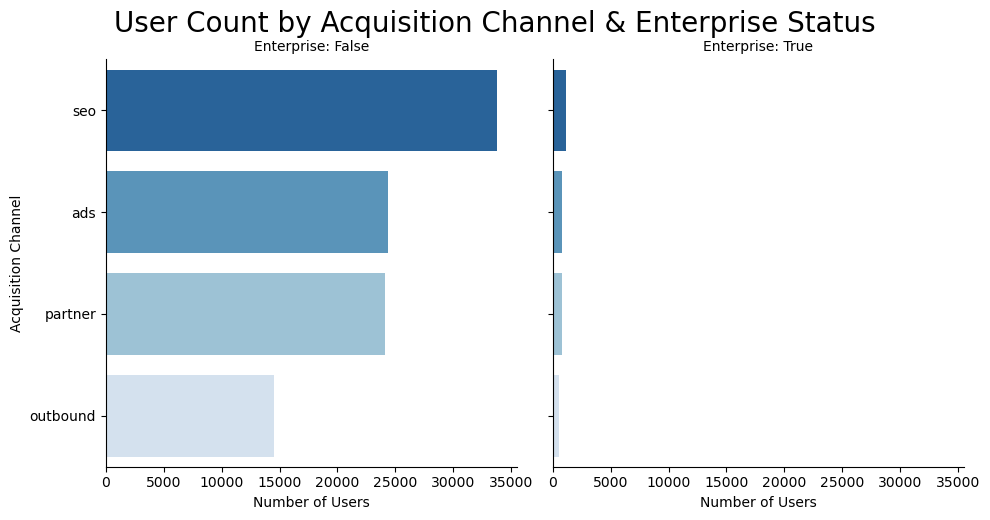

In [ ]:
plot_data = users_df.groupby(['is_enterprise', 'acquisition_channel'])['user_id'].nunique().reset_index(name='user_count')
plot_data = plot_data.sort_values(['is_enterprise', 'user_count'], ascending=[True, False])

g = sns.catplot(
    data=plot_data,
    x='user_count',
    y='acquisition_channel',
    col='is_enterprise', 
    kind='bar',
    palette='Blues_r',
)

g.fig.suptitle('User Count by Acquisition Channel & Enterprise Status', fontsize=20, y=1.03)
g.set_axis_labels('Number of Users', 'Acquisition Channel')
g.set_titles("Enterprise: {col_name}")

/var/folders/86/f0p_j94s7f1c8v5173hp7m9w0000gn/T/ipykernel_99280/2487561622.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


industry
transport        46287
finance          46208
manufacturing    46192
education        45777
software         45732
media            45598
telecom          45533
energy           45136
healthcare       44926
retail           44655
Name: count, dtype: int64


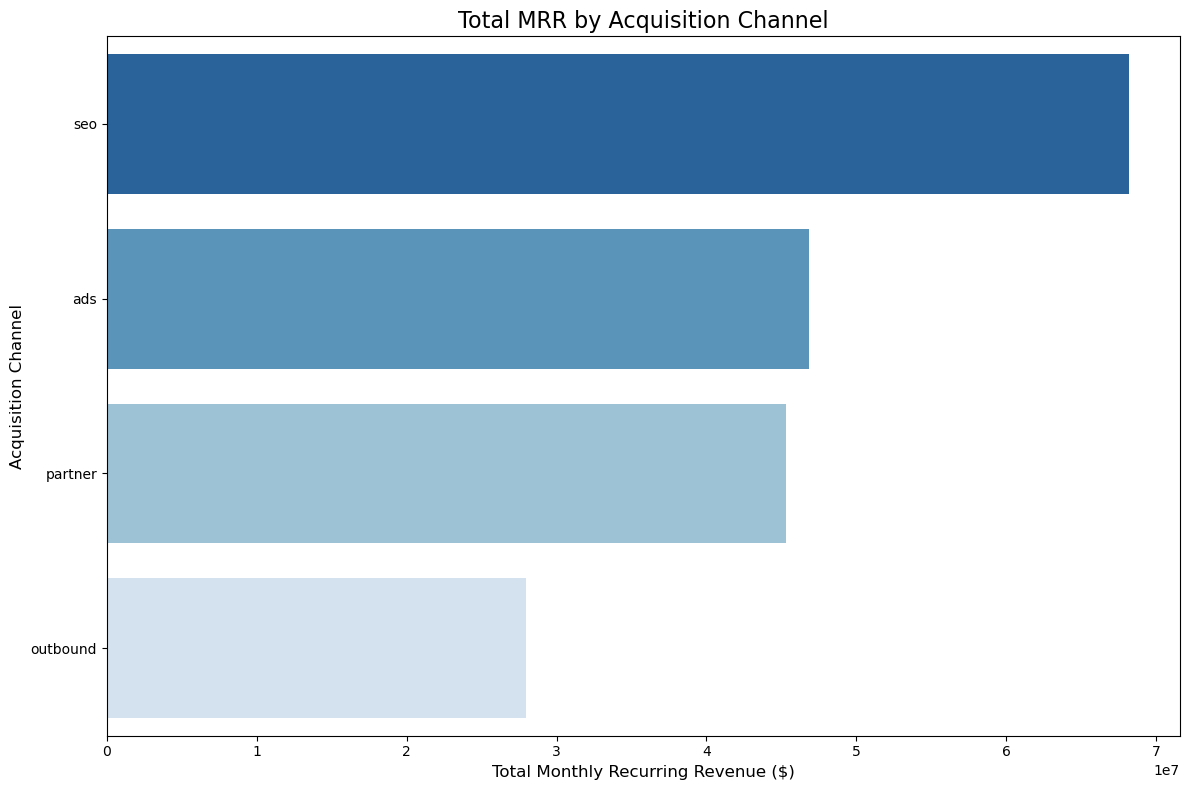

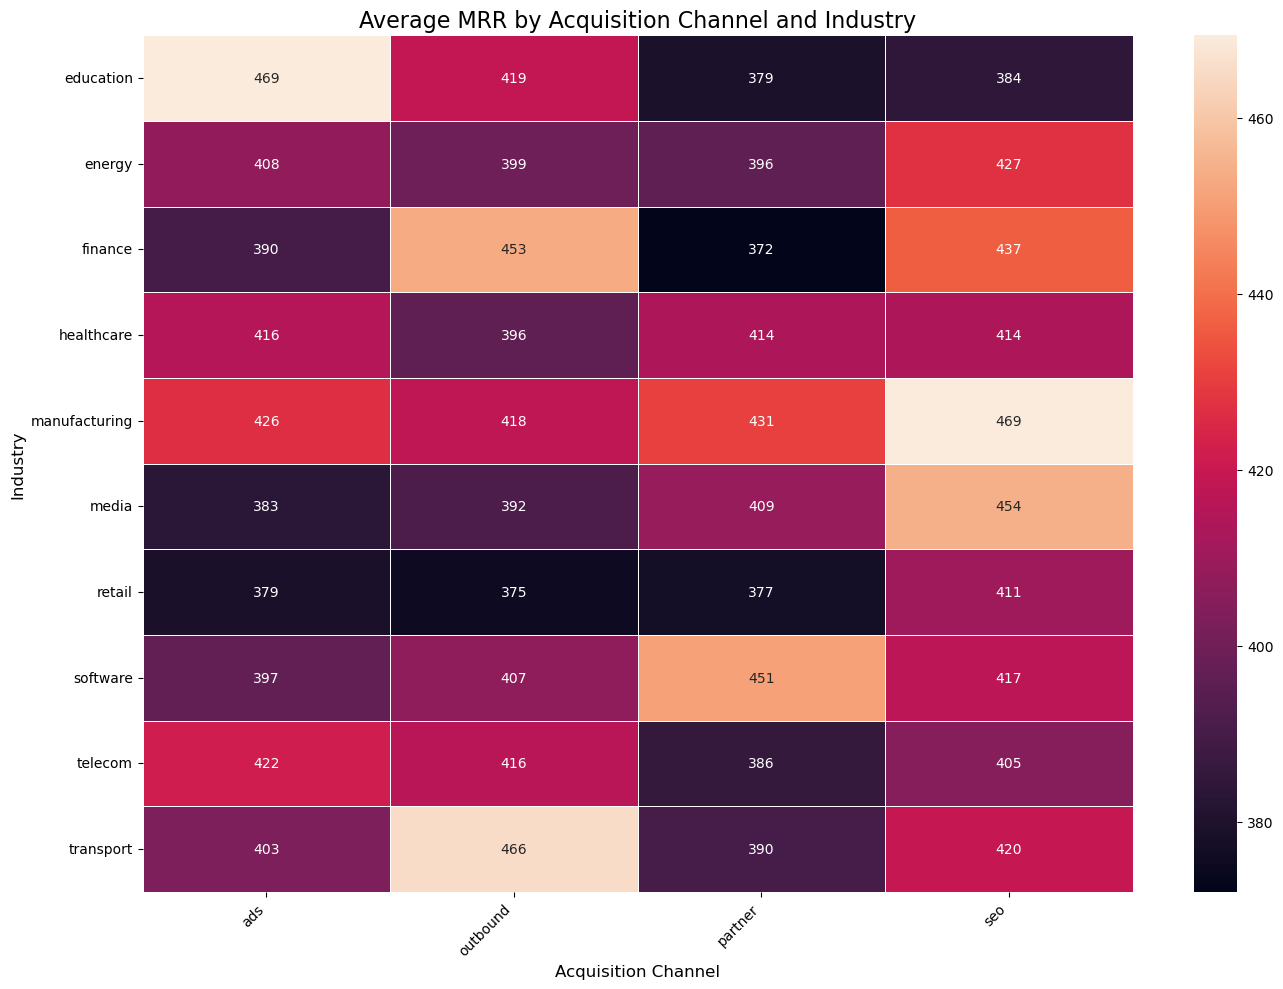

In [10]:

merged_df = pd.merge(billing_df, users_df, on='user_id', how='left')
paying_users_df = merged_df[merged_df['mrr'] > 0].copy()


# Group by channel and sum the MRR
total_mrr_by_channel = paying_users_df.groupby('acquisition_channel')['mrr'].sum().reset_index()
total_mrr_by_channel = total_mrr_by_channel.sort_values('mrr', ascending=False)

plt.figure(figsize=(12, 8))
ax1 = sns.barplot(
    data=total_mrr_by_channel,
    x='mrr',
    y='acquisition_channel',
    palette='Blues_r'
)

plt.title('Total MRR by Acquisition Channel', fontsize=16)
plt.xlabel('Total Monthly Recurring Revenue ($)', fontsize=12)
plt.ylabel('Acquisition Channel', fontsize=12)

plt.tight_layout()


print(paying_users_df['industry'].value_counts())
# Pivot table to calculate the average MRR
pivot_table = paying_users_df.pivot_table(
    values='mrr',
    index='industry',
    columns='acquisition_channel',
    aggfunc='mean'
)

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table,
    annot=True,      
    fmt=".0f",       
    linewidths=.5
)

plt.title('Average MRR by Acquisition Channel and Industry', fontsize=16)
plt.xlabel('Acquisition Channel', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

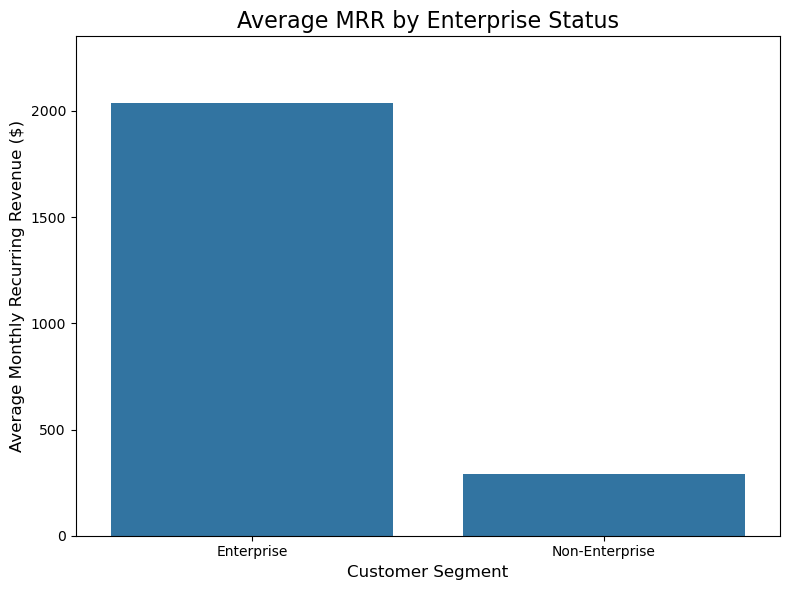

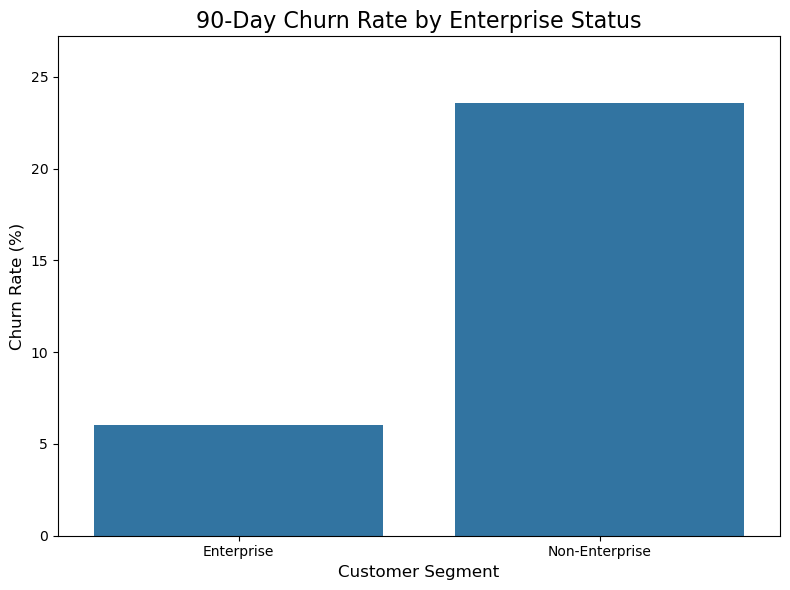

In [15]:

# Map boolean to string for clearer labels
paying_users_df['Enterprise Status'] = paying_users_df['is_enterprise'].apply(lambda x: 'Enterprise' if x else 'Non-Enterprise')
users_df['Enterprise Status'] = users_df['is_enterprise'].apply(lambda x: 'Enterprise' if x else 'Non-Enterprise')

avg_mrr_by_enterprise = paying_users_df.groupby('Enterprise Status')['mrr'].mean().reset_index()

plt.figure(figsize=(8, 6))
ax1 = sns.barplot(
    data=avg_mrr_by_enterprise,
    x='Enterprise Status',
    y='mrr',
)

plt.title('Average MRR by Enterprise Status', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Average Monthly Recurring Revenue ($)', fontsize=12)
plt.ylim(0, plt.ylim()[1] * 1.1)
plt.tight_layout()



# Group by enterprise status and calculate the churn rate
churn_rate_df = users_df.groupby('Enterprise Status')['churned_90d'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
churn_rate_df = churn_rate_df[churn_rate_df['churned_90d'] == 1] # Filter for only the churned percentage

plt.figure(figsize=(8, 6))
ax2 = sns.barplot(
    data=churn_rate_df,
    x='Enterprise Status',
    y='percentage',
)

plt.title('90-Day Churn Rate by Enterprise Status', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.ylim(0, plt.ylim()[1] * 1.1)
plt.tight_layout()